# CRNN for Axial Images

In [104]:
import tensorflow as tf
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
import numpy as np
import os
from tensorflow import keras

In [105]:
import os

def get_image_files(folder_path):
    """Get a sorted list of image files from a given folder based on the number before the underscore."""
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    image_files.sort(key=lambda x: int(x.split('_')[0]))  # Sort based on the number before the underscore
    return image_files

def get_mri_image_paths(base_folder):
    """Create a 2D array where each index is a list of paths to JPEG images for each MRI image, sorted by the number before the underscore."""
    mri_image_paths = []
    for class_folder in os.listdir(base_folder):
        class_path = os.path.join(base_folder, class_folder)
        if os.path.isdir(class_path):
            for mri_folder in os.listdir(class_path):
                mri_path = os.path.join(class_path, mri_folder)
                if os.path.isdir(mri_path):
                    image_files = get_image_files(mri_path)
                    image_paths = [os.path.join(mri_path, img_file) for img_file in image_files]
                    mri_image_paths.append(image_paths)
    return mri_image_paths

# Define base folder
base_folder = 'Desktop/Organized_Image_Data copy 2'

# Get MRI image paths
mri_image_paths = get_mri_image_paths(base_folder)

# mri_image_paths now contains a 2D array with paths to JPEG images sorted by the number before the underscore
for i, paths in enumerate(mri_image_paths):
    print(f"Image paths for MRI {i}: {paths}")

Image paths for MRI 0: ['Desktop/Organized_Image_Data copy 2/AD/I30873/1_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/2_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/3_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/4_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/5_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/6_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/7_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/8_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/9_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/10_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/11_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/12_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/13_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/14_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/I30873/15_I30873.jpg', 'Desktop/Organized_Image_Data copy 2/AD/

In [106]:
final_data = []
for x in mri_image_paths:
    start =  (len(x) // 2)  - 5
    lst = []
    for i in range(10):
        lst.append(x[start + i])
    final_data.append(lst)
        

In [107]:
final_data

[['Desktop/Organized_Image_Data copy 2/AD/I30873/20_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/21_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/22_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/23_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/24_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/25_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/26_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/27_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/28_I30873.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I30873/29_I30873.jpg'],
 ['Desktop/Organized_Image_Data copy 2/AD/I116121/20_I116121.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I116121/21_I116121.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I116121/22_I116121.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I116121/23_I116121.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I116121/24_I116121.jpg',
  'Desktop/Org

In [108]:
len(final_data)

434

In [109]:
ids = []
for lst in final_data:
    id_ = lst[i].split('_')
    id_num = id_[-1].strip(".jpg")
    ids.append(id_num)

In [110]:

# Example list of IDs

# Load the CSV file into a pandas DataFrame
csv_file = 'Desktop/newAxial_6_26_2024.csv'  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

# Initialize lists for IDs and corresponding categories
y = []

# Find categories for each ID in id_list
for id_num in ids:
    row = df[df['Image Data ID'] == id_num]
    y.append(row['Group'].iloc[0])  # Assuming 'Category' is a single value per ID

# Print found IDs and categories
print("y:", y)
print(len(y))

# # Create train/test splits
# train_ids, test_ids, train_categories, test_categories = train_test_split(found_ids, categories, test_size=0.2, random_state=42)

# # Print train/test splits
# print("\nTrain IDs:", train_ids)
# print("Train Categories:", train_categories)
# print("\nTest IDs:", test_ids)
# print("Test Categories:", test_categories)


y: ['AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 

In [111]:
from sklearn.model_selection import train_test_split
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.2, random_state=42)


In [112]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [113]:
# Iterate through the dataset and print the contents
for sequence, label in train_dataset:
    print("Sequence shape:", sequence.shape)  # Print shape of the sequence (batch of images)
    print("Label:", label.numpy())  # Convert label tensor to numpy array and print it
    # Optionally, visualize or process each sequence here


Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'MCI'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'CN'
Sequence shape: (10,)
Label: b'AD'
Sequence shape: (10,)
Label: b'MCI'
Sequence s

2024-06-28 18:21:24.681017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


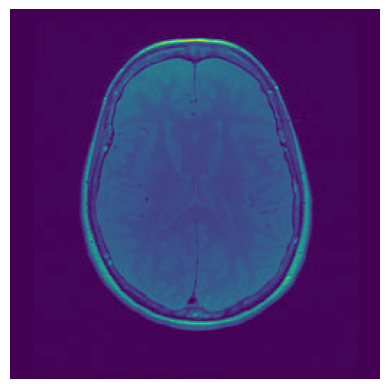

In [114]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = "Desktop/Organized_Image_Data copy 2/AD/I30873/20_I30873.jpg"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Optional: turn off axis labels
plt.show()


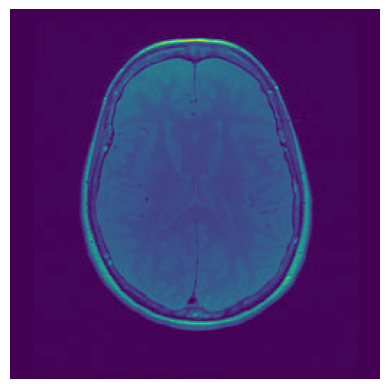

Image shape: (256, 256)
Pixel values:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [115]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
image_path = "Desktop/Organized_Image_Data copy 2/AD/I30873/20_I30873.jpg"

# Load the image using matplotlib
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Get pixel values
pixels = img

# Print all pixel values
print("Image shape:", pixels.shape)
print("Pixel values:")

# Print pixel values directly
print(pixels)


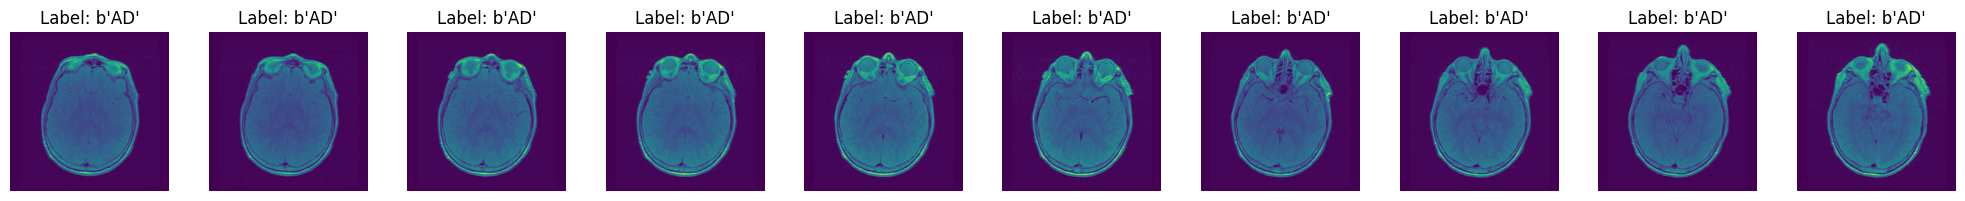

2024-06-28 18:21:25.167922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Assuming train_dataset is your TensorFlow dataset
for sequence, label in train_dataset.take(1):  # Take the first batch
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed
    
    for i, image_path in enumerate(sequence):
        image_path_str = image_path.numpy().decode('utf-8')  # Convert bytes to string
        image = Image.open(image_path_str)  # Load image using PIL (you can also use OpenCV)
        
        plt.subplot(1, 10, i + 1)  # 1 row, 10 columns, i+1 is the index of the subplot
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    
    plt.tight_layout()  # Adjust spacing between plots
    plt.show()


# BUILD CRNN

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, Reshape, MaxPooling2D, BatchNormalization, ReLU, Dropout, Reshape, LSTM, TimeDistributed
from tensorflow.keras.regularizers import l2

In [208]:
shape_CNN = (10,256,256,32)
shape = (10,256,256,1)

In [402]:

def Model(shape):
    
    model = Sequential()
    model.add(Input(shape = shape))
    # First Block
    model.add(TimeDistributed(Conv2D(32, (2, 2), activation="relu", padding="same")))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))

    # Second Block
    model.add(TimeDistributed(Conv2D(64,(2,2),1,activation = "relu",padding = "same")))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))

    #Third Block
    model.add(TimeDistributed(Conv2D(128,(2,2),1,activation = "relu",padding = "same")))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))

    # Fourth Block
    model.add(TimeDistributed(Conv2D(128,(2,2),1,activation = "relu",padding = "same")))
    model.add(TimeDistributed(MaxPooling2D(padding = "same")))
    
    # Fifth Block
    model.add(TimeDistributed(Flatten()))  # Flatten before LSTM
    print(model.output_shape)
    # Reshape to fit LSTM input
     # Assuming 32*32*128 = 4096 after flattening
    # RNN Layers
    model.add(LSTM(128,return_sequences = True,input_shape = (None,10,131072)))

    # Final Layer

    model.add((Dense(128,activation = "relu")))
    model.add((Dense(3,activation = "softmax")))

    return model


In [403]:
model = Model(shape)

(None, 10, 32768)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [390]:
model.compile('adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [391]:
model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_293            │ (None, 10, 256, 256,   │           160 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_294            │ (None, 10, 128, 128,   │             0 │
│ (TimeDistributed)               │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_295            │ (None, 10, 128, 128,   │         8,256 │
│ (TimeDistributed)               │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_296            │ (None, 10, 64, 64, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_297            │ (None, 10, 64, 64,     │        32,896 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_298            │ (None, 10, 32, 32,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_299            │ (None, 10, 32, 32,     │        65,664 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_300            │ (None, 10, 16, 16,     │             0 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_301            │ (None, 10, 32768)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 10, 128)        │    16,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10, 3)          │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,967,139 (64.72 MB)

 Trainable params: 16,967,139 (64.72 MB)

 Non-trainable params: 0 (0.00 B)

In [392]:
len(X_train)

347

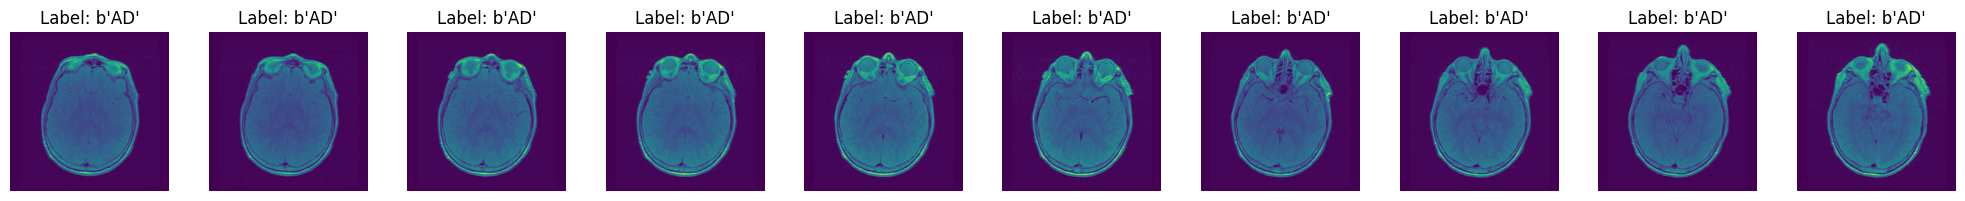

2024-06-28 19:19:01.925468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [393]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Assuming train_dataset is your TensorFlow dataset
for sequence, label in train_dataset.take(1):  # Take the first batch
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed
    
    for i, image_path in enumerate(sequence):
        image_path_str = image_path.numpy().decode('utf-8')  # Convert bytes to string
        image = Image.open(image_path_str)  # Load image using PIL (you can also use OpenCV)
        
        plt.subplot(1, 10, i + 1)  # 1 row, 10 columns, i+1 is the index of the subplot
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis("off")
    
    plt.tight_layout()  # Adjust spacing between plots
    plt.show()

In [394]:
for sequence, label in train_dataset.take(1):  # Take the first batch
    plt.figure(figsize=(20, 2))  # Adjust the figure size as needed
    
    for i, image_path in enumerate(sequence):
        image_path_str = image_path.numpy().decode('utf-8')  # Convert bytes to string
        print(image_path_str)

Desktop/Organized_Image_Data copy 2/AD/I124842/20_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/21_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/22_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/23_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/24_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/25_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/26_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/27_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/28_I124842.jpg
Desktop/Organized_Image_Data copy 2/AD/I124842/29_I124842.jpg


2024-06-28 19:19:01.932985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 2000x200 with 0 Axes>

In [395]:
X_train

[['Desktop/Organized_Image_Data copy 2/AD/I124842/20_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/21_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/22_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/23_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/24_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/25_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/26_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/27_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/28_I124842.jpg',
  'Desktop/Organized_Image_Data copy 2/AD/I124842/29_I124842.jpg'],
 ['Desktop/Organized_Image_Data copy 2/CN/I466049/20_I466049.jpg',
  'Desktop/Organized_Image_Data copy 2/CN/I466049/21_I466049.jpg',
  'Desktop/Organized_Image_Data copy 2/CN/I466049/22_I466049.jpg',
  'Desktop/Organized_Image_Data copy 2/CN/I466049/23_I466049.jpg',
  'Desktop/Organized_Image_Data copy 2/CN/I466049/24_I466049.

In [396]:
from PIL import Image
import numpy as np

def get_values(path):
    # Assuming final_data[0][0] contains the path to your image
    image_path = path
    
    # Open the image using PIL
    im = Image.open(image_path)
    
    # Convert PIL Image to numpy array
    im_array = np.array(im)
    
    # Now you can access and manipulate the image as a numpy array
    return(im_array)  # Check the shape of the numpy array


In [397]:
print(get_values(final_data[0][0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [398]:
len(total_images)

0

In [399]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example y labels (replace with your actual labels)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform them
y_numeric = label_encoder.fit_transform(y)

print("Original labels:", y)
print("Numeric labels:", y_numeric)


Original labels: [0 0 0 0 0 0 0 0 0 0]
Numeric labels: [0 0 0 0 0 0 0 0 0 0]


In [400]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# import tensorflow as tf

# # Normalize the images
# X = np.array(total_images) / 255.0

# # Convert y to a numpy array if not already
# y_true = np.array(y_numeric)

# # Train/test split
# X_train_true, X_test_true, y_train_true, y_test_true = train_test_split(X, y_true, test_size=0.2, random_state=42)


In [401]:

total_images = []
counter = 10
for x in final_data:
    image_pixels = []
    for image in x:
        image_pixels.append(get_values(image))
    y = y_numeric[counter - counter : counter]
    print(y.shape)
    X_train_true = np.expand_dims(image_pixels, axis=-1)
    print(X_train_true.shape)
    
    history = model.fit(X_train_true, y, epochs=10)
    total_images.append(image_pixels)

(10,)
(10, 256, 256, 1)
Epoch 1/10


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 2048 and 32768 for '{{node sequential_38_1/lstm_30_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_38_1/lstm_30_1/strided_slice_2, sequential_38_1/lstm_30_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [?,2048], [32768,512].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(None, 2048), dtype=float32)
  • states=('tf.Tensor(shape=(None, 128), dtype=float32)', 'tf.Tensor(shape=(None, 128), dtype=float32)')
  • training=True